In [1]:
import sys
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np
from numpy import nansum, nanmax, nanmin, nanmean
import netCDF4 as nc

# geo tools
import shapely
from scipy.interpolate import griddata
from cartopy.io.shapereader import Reader

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Land mask

In [ ]:
with h5py.File(PRISM_dir+'land_mask_NA.hdf', 'r') as hdf_io:
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    land_mask = hdf_io['land_mask'][...]

### JRA-55

In [28]:
with nc.Dataset(JRA_TMEAN_dir+'anl_surf.011_tmp.reg_tl319.2015010100_2015013118.sha410426.nc', 'r') as nc_io:
    T2 = nc_io['TMP_GDS4_HTGL'][...]
    
with nc.Dataset(JRA_TMEAN_dir+'anl_surf.011_tmp.reg_tl319.2015010100_2015013118.sha410426.nc', 'r') as nc_io:
    x025 = nc_io['g4_lon_2'][...]-360
    y025 = nc_io['g4_lat_1'][...]
lon_025, lat_025 = np.meshgrid(x025, y025)

In [33]:
test = T2.reshape(31, 4, 67, 98)
test = np.nanmean(test, axis=1)

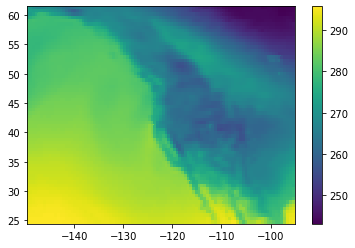

In [36]:
plt.pcolormesh(lon_025, lat_025, test[0, ...])
plt.colorbar()

In [61]:
with h5py.File(JRA_dir+'JRA_TMEAN_features_2015_2020.hdf', 'r') as h_io:
    lon_4km = h_io['lon_4km'][...]
    lat_4km = h_io['lat_4km'][...]
    TMEAN = h_io['TMEAN_REGRID'][...]
    land_mask = h_io['land_mask'][...]

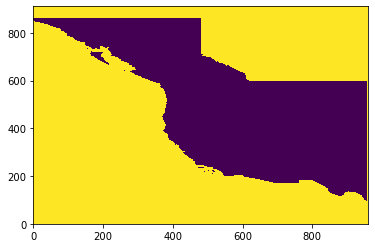

In [63]:
plt.pcolormesh(land_mask)

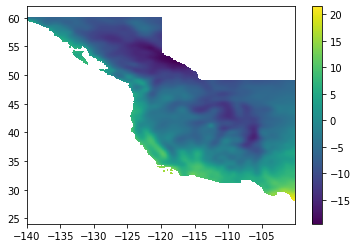

In [29]:
plt.pcolormesh(lon_4km, lat_4km, TMEAN[0, ...])
plt.colorbar()

In [94]:
var = 'TMEAN'
key = '{}_REGRID'.format(var)
with h5py.File(JRA_dir + 'JRA_{}_features_2015_2020.hdf'.format(var), 'r') as hdf_io:
    input_train_3d = hdf_io[key][...]

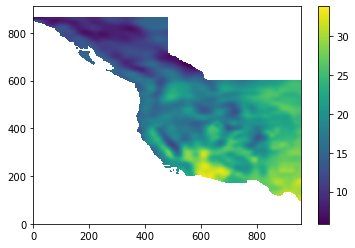

In [96]:
plt.pcolormesh(input_train_3d[203, ...])
plt.colorbar()

In [ ]:
/glade/scratch/ksha/DATA/PRISM_dscale/TMEAN_BATCH_64_VJRA_djf106.npy
/glade/scratch/ksha/DATA/PRISM_dscale/TMEAN_BATCH_64_VJRA_djf107.npy
/glade/scratch/ksha/DATA/PRISM_dscale/TMEAN_BATCH_64_VJRA_djf

In [120]:
temp_data = np.load('/glade/scratch/ksha/DATA/PRISM_dscale/TMEAN_BATCH_64_TERA_djf2.npy', allow_pickle=True)[()]
X = temp_data['batch']

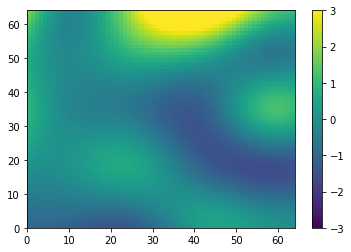

In [146]:
plt.pcolormesh(X[34, ..., 2], vmin=-3, vmax=3)
plt.colorbar()

### ERA

In [17]:
with nc.Dataset(ERA_TMEAN_dir + 'ei.oper.fc.sfc.regn128sc.2019083112.sha410420.nc', 'r') as nc_io:
    y025 = nc_io['g4_lat_1'][...]
    x025 = nc_io['g4_lon_2'][...]
    T2 = nc_io['2T_GDS4_SFC'][...]

In [19]:
lon_025, lat_025 = np.meshgrid(x025, y025)

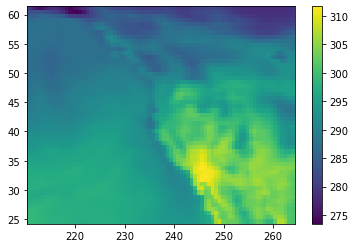

In [22]:
plt.pcolormesh(lon_025, lat_025, T2[0, ...])
plt.colorbar()

In [31]:
with h5py.File(ERA_dir+'ERA_TMEAN_features_2015_2020.hdf', 'r') as h_io:
    lon_4km = h_io['lon_4km'][...]
    lat_4km = h_io['lat_4km'][...]
    TMEAN = h_io['TMEAN_REGRID'][...]
    etopo = h_io['etopo_4km'][...]

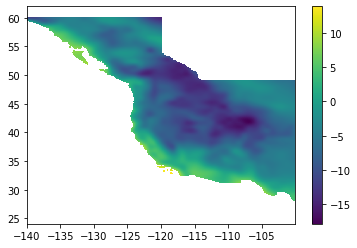

In [26]:
plt.pcolormesh(lon_4km, lat_4km, TMEAN[0, ...])
plt.colorbar()

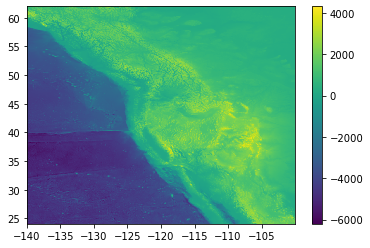

In [33]:
plt.pcolormesh(lon_4km, lat_4km, etopo)
plt.colorbar()